<a href="https://colab.research.google.com/github/BatuhanBulcum/E-commerce_Data_Analysis_for_Sales_Strategy/blob/main/E_commerce_Data_Analysis_for_Sales_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Data Analysis for Sales Strategy**

## **Our goal is to decide on the sales strategy for 2020 based on sales data in 2019.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Let's examine Kmart 2019 sales data.

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Sales_January_2019.csv")
df1["Month"]="Jan"
df2=pd.read_csv("/content/drive/MyDrive/Sales_February_2019.csv")
df2["Month"]="Feb"
df3=pd.read_csv("/content/drive/MyDrive/Sales_March_2019.csv")
df3["Month"]="Mar"
df4=pd.read_csv("/content/drive/MyDrive/Sales_April_2019.csv")
df4["Month"]="Apr"
df5=pd.read_csv("/content/drive/MyDrive/Sales_May_2019.csv")
df5["Month"]="May"
df6=pd.read_csv("/content/drive/MyDrive/Sales_June_2019.csv")
df6["Month"]="June"
df7=pd.read_csv("/content/drive/MyDrive/Sales_July_2019.csv")
df7["Month"]="July"
df8=pd.read_csv("/content/drive/MyDrive/Sales_August_2019.csv")
df8["Month"]="Aug"
df9=pd.read_csv("/content/drive/MyDrive/Sales_September_2019.csv")
df9["Month"]="Sep"
df10=pd.read_csv("/content/drive/MyDrive/Sales_October_2019.csv")
df10["Month"]="Oct"
df11=pd.read_csv("/content/drive/MyDrive/Sales_November_2019.csv")
df11["Month"]="Nov"
df12=pd.read_csv("/content/drive/MyDrive/Sales_December_2019.csv")
df12["Month"]="Dec"

In [ ]:
list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
Dataframe=pd.concat(list)
Dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec


Let's check the NaN values.

In [ ]:
Dataframe.isnull().any()

Order ID             True
Product              True
Quantity Ordered     True
Price Each           True
Order Date           True
Purchase Address     True
Month               False
dtype: bool

Subtract the NaN values.

In [ ]:
Dataframe.dropna(subset = ["Order ID","Product","Quantity Ordered","Price Each","Order Date","Purchase Address"], inplace=True)

In [ ]:
Dataframe.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Month               False
dtype: bool

Subtract the values that are the same as the title.

In [ ]:
Dataframe_filtered = Dataframe[Dataframe['Price Each'] != "Price Each"] 

In [ ]:
Dataframe_filtered.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

Editing the data type.

In [ ]:
Dataframe_filtered["Quantity Ordered"]=Dataframe_filtered["Quantity Ordered"].astype("float")
Dataframe_filtered["Price Each"]=Dataframe_filtered["Price Each"].astype("float")
Dataframe_filtered["Sales"]=Dataframe_filtered["Quantity Ordered"]*Dataframe_filtered["Price Each"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Examine the data after editing.

In [ ]:
Dataframe_filtered

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99


## **Which is the best selling month ?**

In [ ]:
df_month=Dataframe_filtered.groupby(["Month"])['Sales'].sum().sort_values(ascending=False)
df_month=df_month.to_frame()
df_month

,Sales
Month,
Dec,4.619297e+06
Oct,3.736884e+06
Apr,3.396059e+06
Nov,3.198909e+06
May,3.144585e+06
Mar,2.809063e+06
July,2.646900e+06
June,2.578293e+06
Aug,2.244412e+06


The most sales were in December.

**How much has been earned ?**

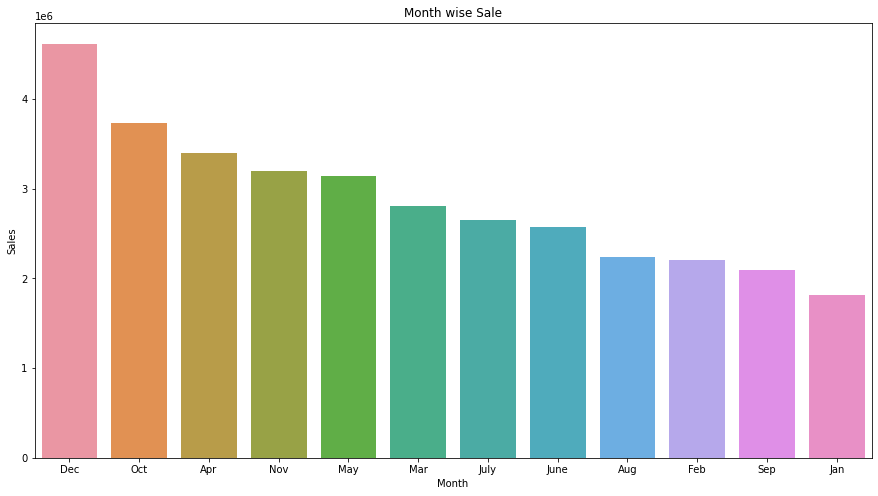

In [ ]:
fig = plt.figure(figsize = (15, 8))
Month=["Dec","Oct","Apr","Nov","May","Mar","July","June","Aug",'Feb',"Sep","Jan"] 
df_month["Month"]=Month
sns.barplot(x = "Month",y = "Sales",data = df_month)
plt.title("Month wise Sale")
plt.show()

In [ ]:
Dec = Dataframe_filtered[Dataframe_filtered.Month == 'Dec']
sales = Dec.Sales
print("Total Sales in December= ",sales.sum())

Total Sales in December=  4619297.119999999


## **Which city has the most purchases ?**

Find out in which cities the sales are taking place.

In [ ]:
df_city = Dataframe_filtered
City = []
for i in df_city['Purchase Address']:
    City.append(i.split(",")[1])
df_city['City'] = City
df_city

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas


Find the total sales for each city.

In [ ]:
df_city=Dataframe_filtered.groupby(["City"])['Sales'].sum().sort_values(ascending=False)
df_city=df_city.to_frame()
df_city

,Sales
City,
San Francisco,8.262204e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Boston,3.661642e+06
Atlanta,2.795499e+06
Dallas,2.767975e+06
Seattle,2.747755e+06
Portland,2.320491e+06
Austin,1.819582e+06


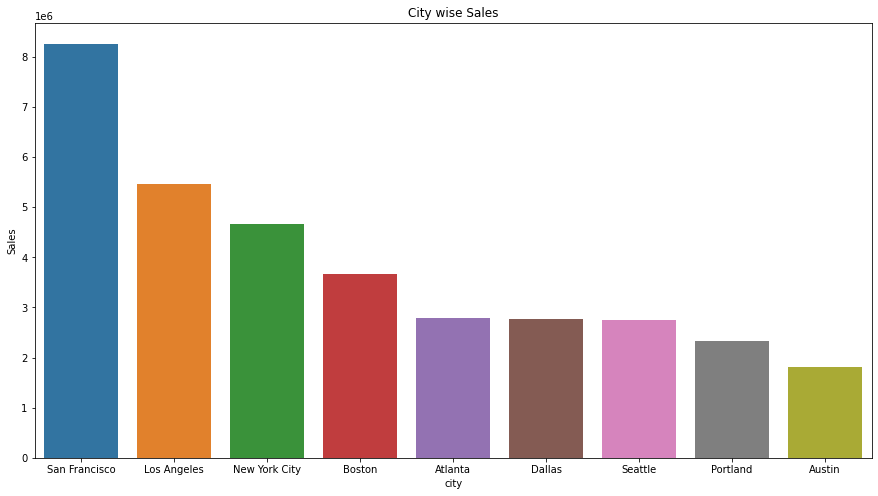

In [ ]:
fig = plt.figure(figsize = (15, 8))
city=["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
df_city["city"]=city
sns.barplot(x = "city" ,y = "Sales",data = df_city)
plt.title("City wise Sales")
plt.show()

San Francisco is the top selling location.

## **Decide on the optimal time frame to maximize the likelihood of customers purchasing the products ?**

Find out in which times the sales are taking place.

In [ ]:
df_time = Dataframe_filtered
Time = []
for i in df_time['Order Date']:
    Time.append(i.split(" ")[1])
df_time['Time'] = Time
df_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston,21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland,14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco,13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles,20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin,11:59
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco,20:58
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles,12:01
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle,06:43
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas,10:39


In [ ]:
df_time=Dataframe_filtered.groupby(['Time'])['Sales'].sum().sort_values(ascending=False)
df_time=df_time.to_frame()
df_time

,Sales
Time,
19:01,54503.14
12:21,54181.96
19:16,54156.39
20:13,53149.51
19:20,52903.41
...,...
02:50,381.99
03:57,317.63
04:05,277.72


The best time for display advertising is 19:01.

## **Which products sold the most ?**

Check out the total sales of the products.

In [ ]:
df_product	=Dataframe_filtered.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
df_product=df_product.to_frame()
df_product

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


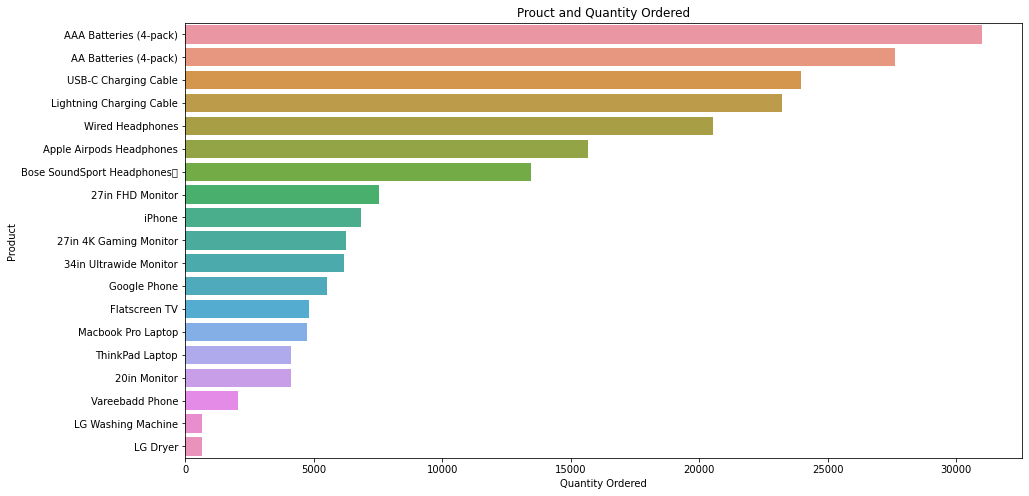

In [ ]:
fig = plt.figure(figsize = (15, 8))
product=["AAA Batteries (4-pack)","AA Batteries (4-pack)","USB-C Charging Cable","Lightning Charging Cable","Wired Headphones","Apple Airpods Headphones","Bose SoundSport Headphones	","27in FHD Monitor","iPhone","27in 4K Gaming Monitor","34in Ultrawide Monitor","Google Phone","Flatscreen TV","Macbook Pro Laptop","ThinkPad Laptop","20in Monitor","Vareebadd Phone","LG Washing Machine","LG Dryer"]
df_product["Product"]=product
sns.barplot(x = "Quantity Ordered",y = "Product",data = df_product)
plt.title("Prouct and Quantity Ordered")
plt.show()

Top 3 products:

1.   AAA Batteries (4-pack)
2.   AA Batteries (4-pack)
3.   USB-C Charging Cable



